<a href="https://colab.research.google.com/github/ccobopie/TFG-BA/blob/main/TFGParte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Componentes Principales (PCA)**

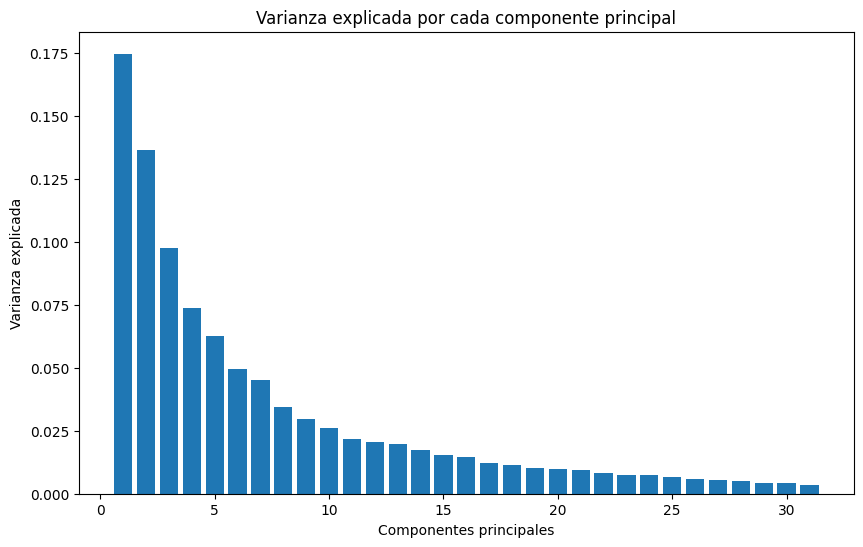

Varianza explicada por cada componente: [0.17476153 0.13655545 0.0977809  0.07369008 0.06265476 0.04972786
 0.04525823 0.03440702 0.02962434 0.02593313 0.02188174 0.0206848
 0.01961571 0.01716906 0.01527046 0.01476619 0.01238711 0.0115639
 0.01008953 0.0096339  0.00940257 0.00825148 0.00762415 0.00730554
 0.00654668 0.00578145 0.00534658 0.0050788  0.00428581 0.00410524
 0.00358235]
Varianza total explicada: 0.9507663417734477
Error de Reconstrucción: 0.04923365822655245


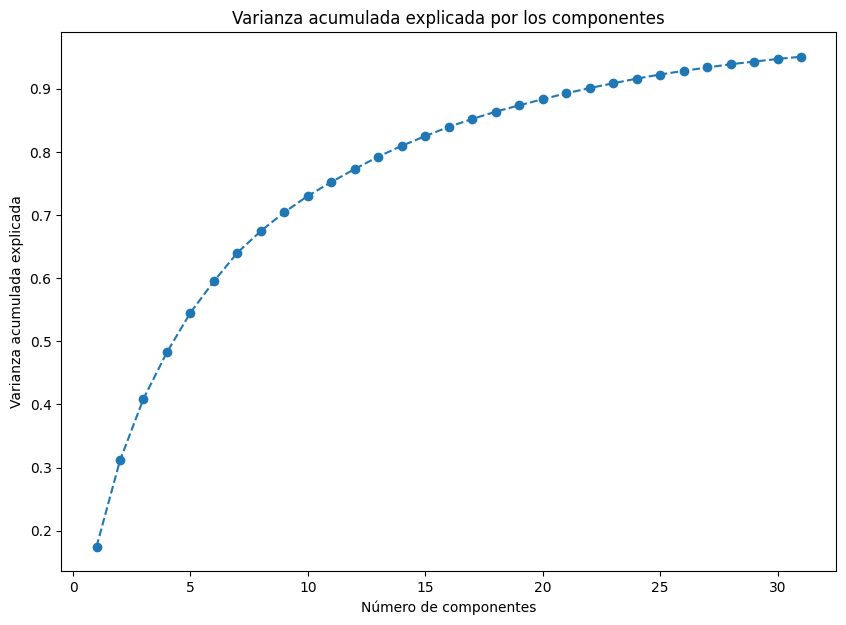

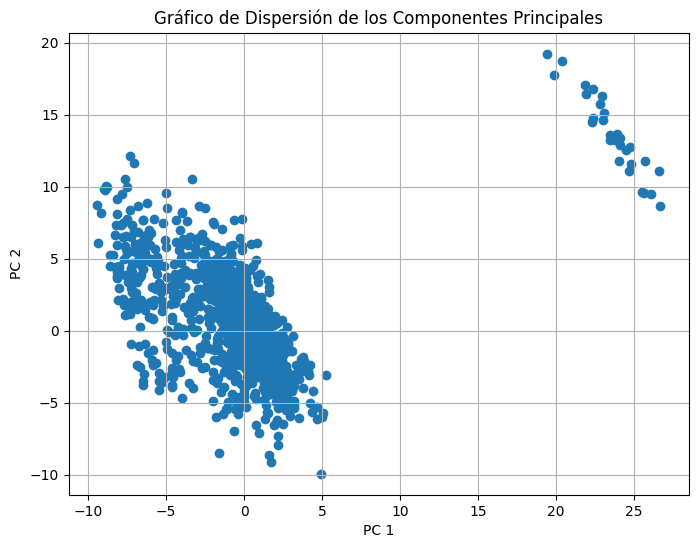

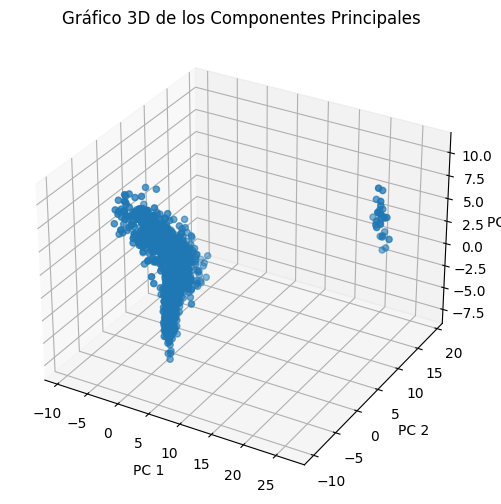

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Carga de datos
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar datos
df = pd.read_csv('/content/BBDD_Final.csv', sep=';')

# Preparar la variable objetivo
df['Proporción_victorias_playoffs'] = df['Playoffwins'] / df['MaxWins']

# Preparar los datos para PCA (excluir claves primarias y variable objetivo)
X = df.drop(['Team', 'Season', 'Playoffwins', 'MaxWins', 'Proporción_victorias_playoffs'], axis=1)
y = df['Proporción_victorias_playoffs']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95) # Conservar el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Visualización de la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal')
plt.show()

# Medidas de adecuación del modelo PCA
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")
# Error de Reconstrucción
X_pca_inverse = pca.inverse_transform(X_pca)  # Invertir la transformación PCA
reconstruction_error = np.mean(np.square(X_scaled - X_pca_inverse))
print(f"Error de Reconstrucción: {reconstruction_error}")

# Visualizar la varianza explicada por cada componente
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza acumulada explicada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.show()

# Gráficos de Componentes Principales (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Gráfico de Dispersión de los Componentes Principales')
plt.grid(True)
plt.show()

# Gráfico 3D (usando los 3 primeros PCs)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title('Gráfico 3D de los Componentes Principales')
plt.show()

# **Regresión lineal multiple**

Regresión Lineal Múltiple - R2: 0.3911379397435202, MSE: 0.05650255782601166, RMSE: 0.2377026668466546, MAE: 0.18153600909334075, MedAE: 0.14273592667828236


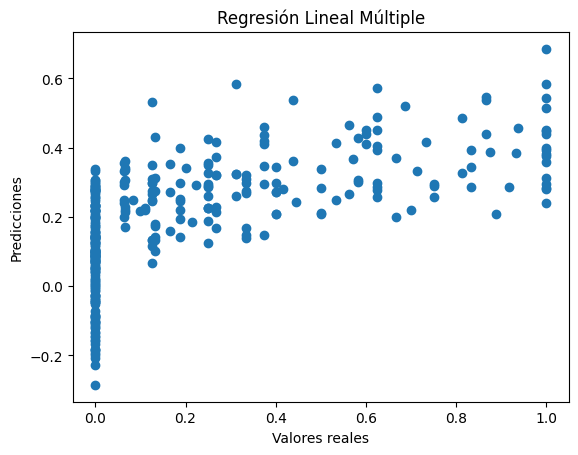

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Asumiendo que X_pca y y ya están definidos como los componentes principales y la variable objetivo

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal múltiple
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

# Métricas de adecuación del modelo para regresión lineal múltiple

r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
medae_linear = median_absolute_error(y_test, y_pred_linear)

print(f"Regresión Lineal Múltiple - R2: {r2_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}, MedAE: {medae_linear}")



# Visualización de la regresión lineal múltiple
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal Múltiple')
plt.show()


# **RLM RIDGE**

Ridge Regression Metrics:
R2: 0.39114403546444876
MSE: 0.0565019921415213
RMSE: 0.2377014769443415
MAE: 0.18152963623535648
MedAE: 0.14277125642445032


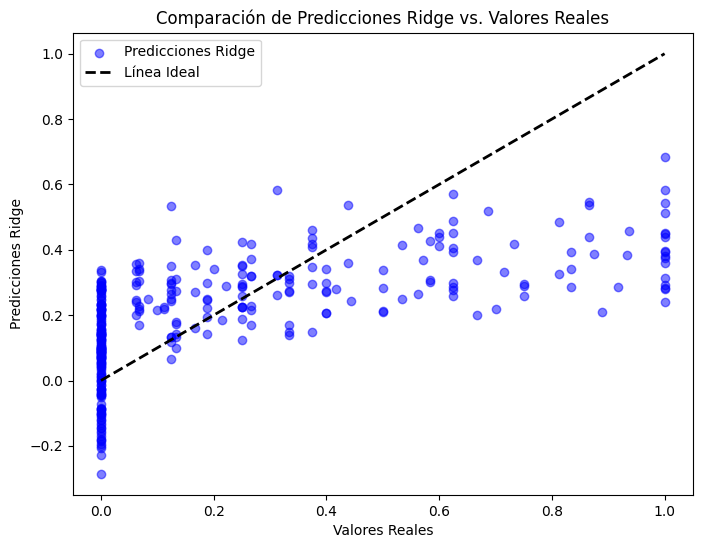

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import numpy as np

# Entrenar el modelo Ridge
ridge_model = Ridge(alpha=1) # Puedes ajustar el valor de alpha según sea necesario
ridge_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test)

# Calcular métricas para el modelo Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
medae_ridge = median_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"R2: {r2_ridge}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"MedAE: {medae_ridge}")

import matplotlib.pyplot as plt

# Visualización para el modelo Ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Predicciones Ridge', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Ridge')
plt.title('Comparación de Predicciones Ridge vs. Valores Reales')
plt.legend()
plt.show()


# **RLM Lasso**


Lasso Regression Metrics:
R2: 0.37525487215432174
MSE: 0.057976510636497336
RMSE: 0.2407831195007186
MAE: 0.18190712709464216
MedAE: 0.14441633313013208


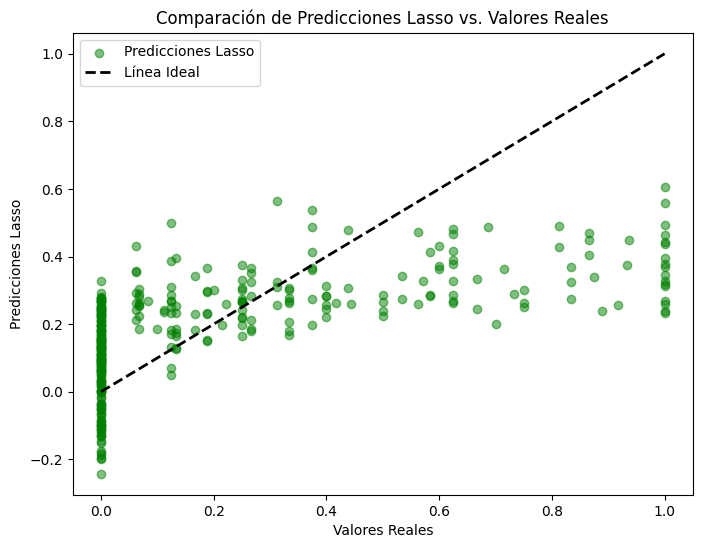

In [ ]:
from sklearn.linear_model import Lasso

# Entrenar el modelo Lasso
lasso_model = Lasso(alpha=0.01) # Puedes ajustar el valor de alpha según sea necesario
lasso_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test)

# Calcular métricas para el modelo Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
medae_lasso = median_absolute_error(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"R2: {r2_lasso}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"MedAE: {medae_lasso}")

# Visualización para el modelo Lasso
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Predicciones Lasso', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Lasso')
plt.title('Comparación de Predicciones Lasso vs. Valores Reales')
plt.legend()
plt.show()


# **Random Forest**

Bosque Aleatorio - R2: 0.47609847316496223, MSE: 0.048618198188704574, RMSE: 0.22049534731758985, MAE: 0.1539672070199593, MedAE: 0.105875


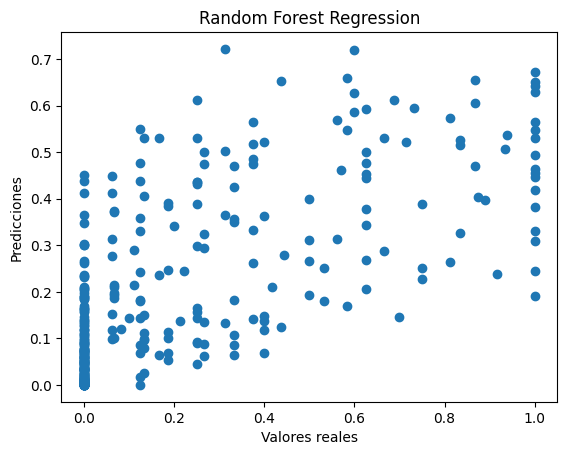

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Inicializar y entrenar el modelo de bosque aleatorio
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = random_forest_model.predict(X_test)

# Métricas de adecuación del modelo para bosque aleatorio
# Métricas para bosque aleatorio
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
medae_rf = median_absolute_error(y_test, y_pred_rf)

print(f"Bosque Aleatorio - R2: {r2_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, MedAE: {medae_rf}")



# Visualización del bosque aleatorio
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regression')
plt.show()


# **Random forest mejora**

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None}
Optimized Random Forest - R2: 0.48393854285271853, MSE: 0.047890637679012436, RMSE: 0.2188392964689213, MAE: 0.1517322685531683, MedAE: 0.09777595188716512


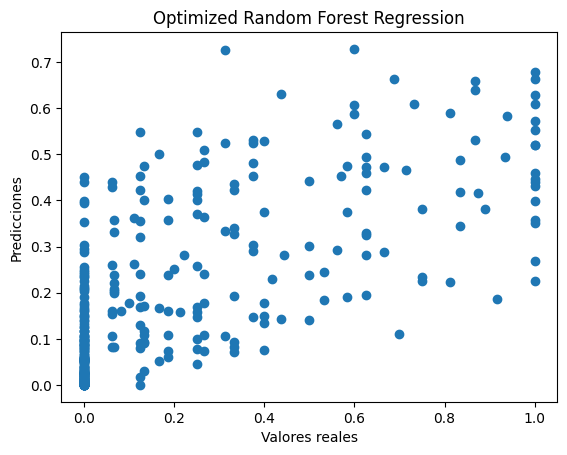

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

# Definir el espacio de hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Inicializar el modelo de bosque aleatorio
rf = RandomForestRegressor(random_state=42)

# Inicializar RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Ajustar el modelo a los datos
rf_random_search.fit(X_train, y_train)

# Ver los mejores parámetros
print(rf_random_search.best_params_)

# Usar el mejor modelo encontrado
best_random_forest_model = rf_random_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_rf = best_random_forest_model.predict(X_test)

# Calcular métricas
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
medae_rf = median_absolute_error(y_test, y_pred_rf)

print(f"Optimized Random Forest - R2: {r2_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}, MedAE: {medae_rf}")

# Visualización del bosque aleatorio optimizado
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Optimized Random Forest Regression')
plt.show()


# **Regresión Polinomial No Lineal**

Regresión Polinomial No Lineal - R2: -0.983450778562541, MSE: 0.18406474902306927, RMSE: 0.42902767862116925, MAE: 0.2733108695079602, MedAE: 0.1857076851673085


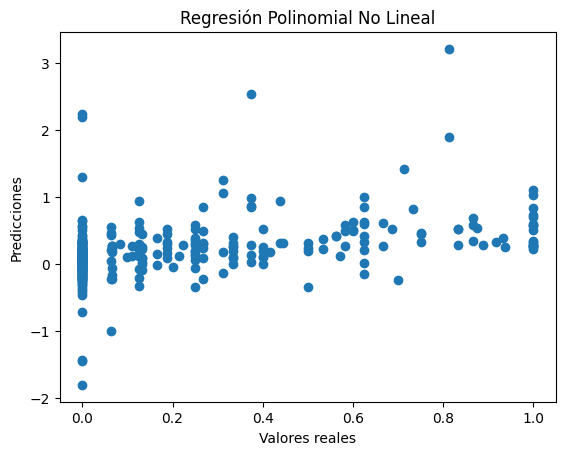

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, median_absolute_error

# Grado del polinomio
degree = 2

# Inicializar y entrenar el modelo de regresión polinomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_poly = poly_model.predict(X_test)

# Métricas para regresión polinomial no lineal
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
medae_poly = median_absolute_error(y_test, y_pred_poly)

print(f"Regresión Polinomial No Lineal - R2: {r2_poly}, MSE: {mse_poly}, RMSE: {rmse_poly}, MAE: {mae_poly}, MedAE: {medae_poly}")

# Visualización de la regresión polinomial no lineal
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Polinomial No Lineal')
plt.show()


# **Reguralización Ridge & Lasso**

Ridge Regresión Polinomial - R2: -0.5808693347385996, MSE: 0.1467050861467857, RMSE: 0.3830209996159293, MAE: 0.2539176241452221, MedAE: 0.17704809146757206
Lasso Regresión Polinomial - R2: 0.42088817283013025, MSE: 0.05374172844438553, RMSE: 0.23182262280542323, MAE: 0.16651779541118142, MedAE: 0.11668639253520813


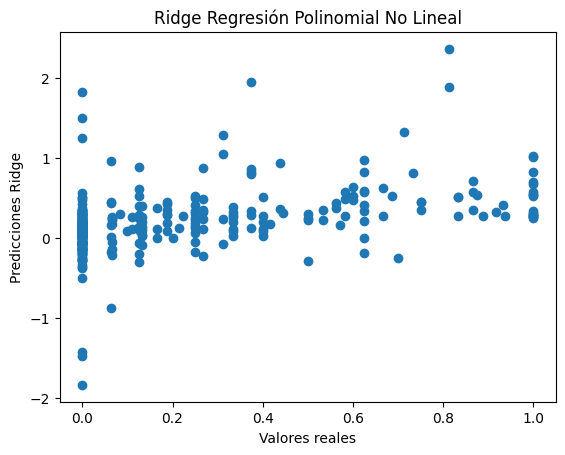

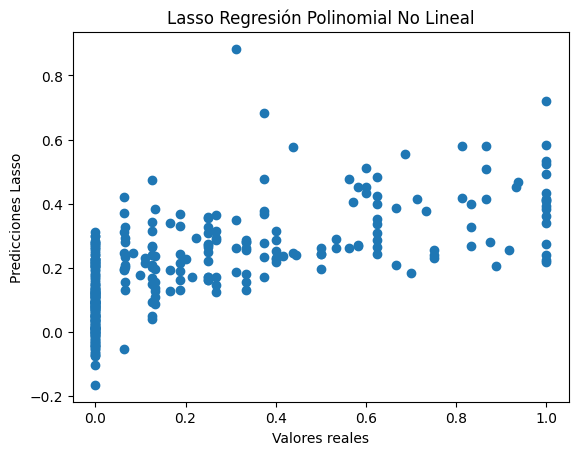

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Configura el grado del polinomio
degree = 2

# Para Ridge
ridge_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=1, random_state=42))
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
medae_ridge = median_absolute_error(y_test, y_pred_ridge)

print(f"Ridge Regresión Polinomial - R2: {r2_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, MAE: {mae_ridge}, MedAE: {medae_ridge}")

# Para Lasso
lasso_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=0.01, random_state=42))
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
medae_lasso = median_absolute_error(y_test, y_pred_lasso)

print(f"Lasso Regresión Polinomial - R2: {r2_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, MAE: {mae_lasso}, MedAE: {medae_lasso}")

# Visualizaciones de los modelos de regresión polinomial con regularización
# Para Ridge
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones Ridge')
plt.title('Ridge Regresión Polinomial No Lineal')
plt.show()

# Para Lasso
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones Lasso')
plt.title('Lasso Regresión Polinomial No Lineal')
plt.show()


# **Lasso GridSearchCV**

In [ ]:
# Para Lasso

from sklearn.model_selection import GridSearchCV

param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

pipeline_lasso = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Lasso(random_state=42))

grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print('Mejor parámetro para Lasso:', grid_search_lasso.best_params_)
print('Mejor MSE para Lasso:', -grid_search_lasso.best_score_)


Mejor parámetro para Lasso: {'lasso__alpha': 0.01}
Mejor MSE para Lasso: 0.05354076113632916


# **Ridge con RandomizedSearchCV**

In [ ]:
# Para Ridge

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist_ridge = {
    'ridge__alpha': uniform(0.1, 10)
}

pipeline_ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge(random_state=42))

random_search_ridge = RandomizedSearchCV(pipeline_ridge, param_distributions=param_dist_ridge, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_ridge.fit(X_train, y_train)

print('Mejor parámetro para Ridge:', random_search_ridge.best_params_)
print('Mejor MSE para Ridge:', -random_search_ridge.best_score_)


Mejor parámetro para Ridge: {'ridge__alpha': 9.968869366005173}
Mejor MSE para Ridge: 0.08586879639610731


# **Modelo final de la regresión polinomal no lineal**

In [ ]:
# Ridge con el mejor alpha encontrado
ridge_final_model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Ridge(alpha=9.968869366005173, random_state=42)
)

ridge_final_model.fit(X_train, y_train)

# Predicciones con el modelo final Ridge
y_pred_ridge_final = ridge_final_model.predict(X_test)

# Evaluación del modelo final Ridge
r2_ridge_final = r2_score(y_test, y_pred_ridge_final)
mse_ridge_final = mean_squared_error(y_test, y_pred_ridge_final)
rmse_ridge_final = mean_squared_error(y_test, y_pred_ridge_final, squared=False)
mae_ridge_final = mean_absolute_error(y_test, y_pred_ridge_final)
medae_ridge_final = median_absolute_error(y_test, y_pred_ridge_final)

print(f"Ridge Final - R2: {r2_ridge_final}, MSE: {mse_ridge_final}, RMSE: {rmse_ridge_final}, MAE: {mae_ridge_final}, MedAE: {medae_ridge_final}")

# Lasso con el mejor alpha encontrado
lasso_final_model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Lasso(alpha=0.01, random_state=42)
)

lasso_final_model.fit(X_train, y_train)

# Predicciones con el modelo final Lasso
y_pred_lasso_final = lasso_final_model.predict(X_test)

# Evaluación del modelo final Lasso
r2_lasso_final = r2_score(y_test, y_pred_lasso_final)
mse_lasso_final = mean_squared_error(y_test, y_pred_lasso_final)
rmse_lasso_final = mean_squared_error(y_test, y_pred_lasso_final, squared=False)
mae_lasso_final = mean_absolute_error(y_test, y_pred_lasso_final)
medae_lasso_final = median_absolute_error(y_test, y_pred_lasso_final)

print(f"Lasso Final - R2: {r2_lasso_final}, MSE: {mse_lasso_final}, RMSE: {rmse_lasso_final}, MAE: {mae_lasso_final}, MedAE: {medae_lasso_final}")


Ridge Final - R2: 0.0758203721387698, MSE: 0.08576411025323918, RMSE: 0.29285510112210644, MAE: 0.21263950958633154, MedAE: 0.16054528955941388
Lasso Final - R2: 0.42088817283013025, MSE: 0.05374172844438553, RMSE: 0.23182262280542323, MAE: 0.16651779541118142, MedAE: 0.11668639253520813


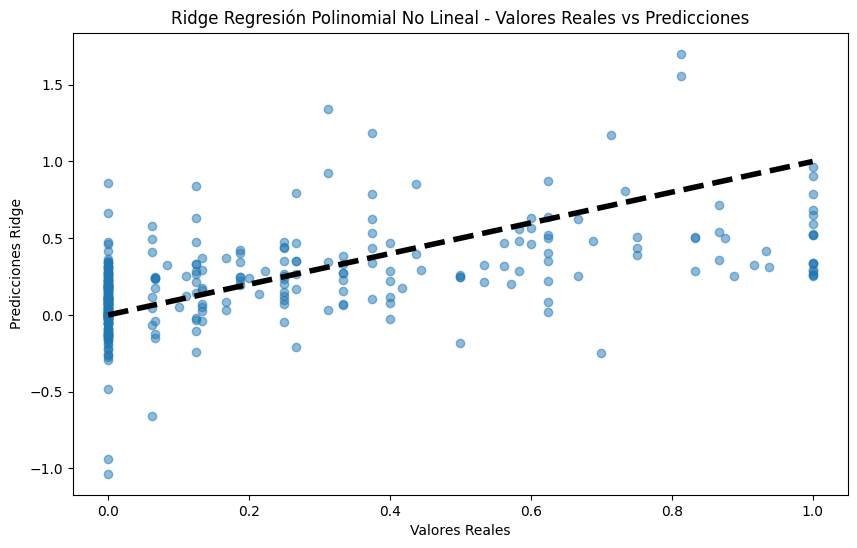

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

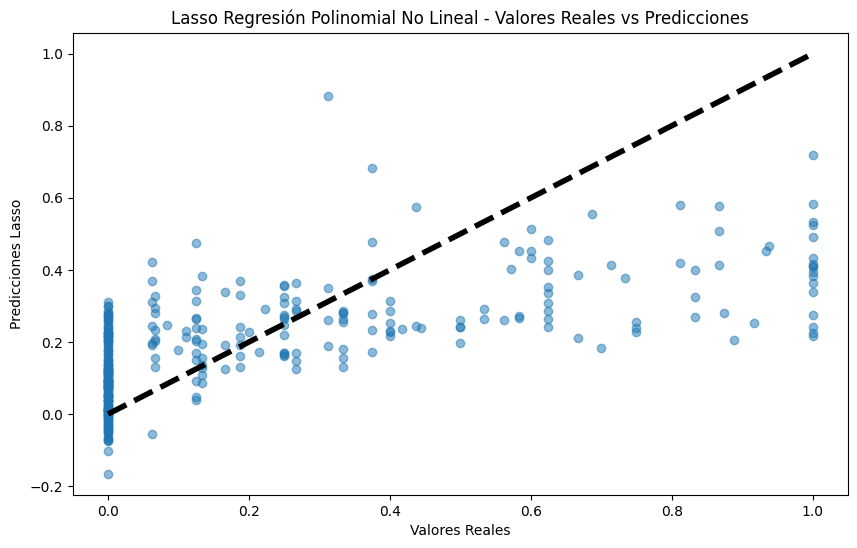

In [ ]:
import matplotlib.pyplot as plt

# Ajuste y evaluación del modelo final Ridge
ridge_final_model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Ridge(alpha=9.968869366005173, random_state=42)
)
ridge_final_model.fit(X_train, y_train)
y_pred_ridge_final = ridge_final_model.predict(X_test)

# Visualización del modelo final Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Ridge')
plt.title('Ridge Regresión Polinomial No Lineal - Valores Reales vs Predicciones')
plt.show()

# Ajuste y evaluación del modelo final Lasso
lasso_final_model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Lasso(alpha=0.01, random_state=42)
)
lasso_final_model.fit(X_train, y_train)
y_pred_lasso_final = lasso_final_model.predict(X_test)

# Visualización del modelo final Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Lasso')
plt.title('Lasso Regresión Polinomial No Lineal - Valores Reales vs Predicciones')
plt


# **Validación cruzada**

In [ ]:
from sklearn.model_selection import cross_validate

# Definimos una lista de modelos para comparar
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=9.968869366005173)),
    ("Lasso Regression", Lasso(alpha=0.01)),
    ("Random Forest", RandomForestRegressor(n_estimators=100))
]

# Métricas que queremos evaluar
scoring = ['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error',
           'neg_mean_absolute_error', 'neg_median_absolute_error']

# Definimos una lista para guardar los resultados
results = []

# Realizamos la validación cruzada para cada modelo
for name, model in models:
    pipeline = make_pipeline(StandardScaler(), model)
    cv_results = cross_validate(pipeline, X_pca, y, cv=5, scoring=scoring)
    results.append((name, cv_results))

# Imprimimos los resultados
for name, cv_results in results:
    print(f"Resultados para {name}:")
    print(f" R2: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std():.4f})")
    print(f" MSE: {-cv_results['test_neg_mean_squared_error'].mean():.4f} (+/- {-cv_results['test_neg_mean_squared_error'].std():.4f})")
    print(f" RMSE: {-cv_results['test_neg_root_mean_squared_error'].mean():.4f} (+/- {-cv_results['test_neg_root_mean_squared_error'].std():.4f})")
    print(f" MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.4f} (+/- {-cv_results['test_neg_mean_absolute_error'].std():.4f})")
    print(f" MedAE: {-cv_results['test_neg_median_absolute_error'].mean():.4f} (+/- {-cv_results['test_neg_median_absolute_error'].std():.4f})")
    print("\n")


Resultados para Linear Regression:
 R2: 0.1691 (+/- 0.2482)
 MSE: 0.0721 (+/- -0.0342)
 RMSE: 0.2619 (+/- -0.0592)
 MAE: 0.1916 (+/- -0.0343)
 MedAE: 0.1376 (+/- -0.0146)


Resultados para Ridge Regression:
 R2: 0.2561 (+/- 0.1721)
 MSE: 0.0650 (+/- -0.0304)
 RMSE: 0.2493 (+/- -0.0531)
 MAE: 0.1875 (+/- -0.0356)
 MedAE: 0.1425 (+/- -0.0189)


Resultados para Lasso Regression:
 R2: 0.2747 (+/- 0.1882)
 MSE: 0.0639 (+/- -0.0322)
 RMSE: 0.2463 (+/- -0.0568)
 MAE: 0.1844 (+/- -0.0388)
 MedAE: 0.1390 (+/- -0.0272)


Resultados para Random Forest:
 R2: 0.2729 (+/- 0.2794)
 MSE: 0.0656 (+/- -0.0423)
 RMSE: 0.2459 (+/- -0.0718)
 MAE: 0.1749 (+/- -0.0427)
 MedAE: 0.1098 (+/- -0.0291)




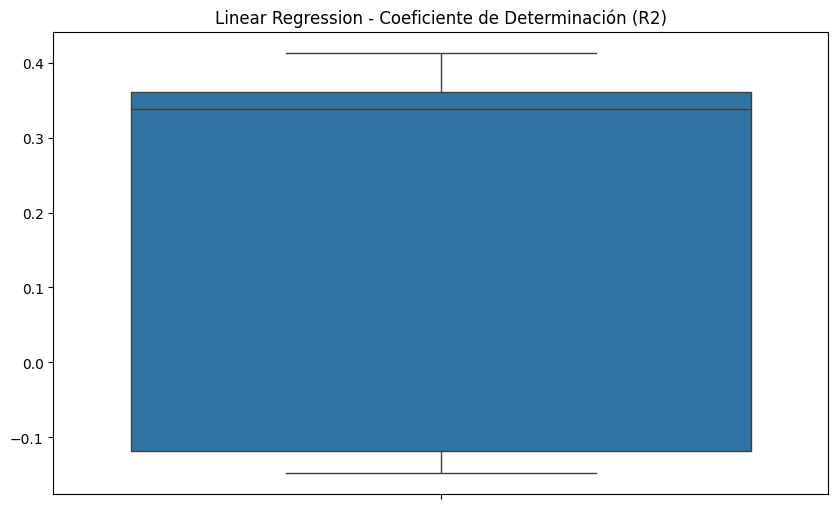

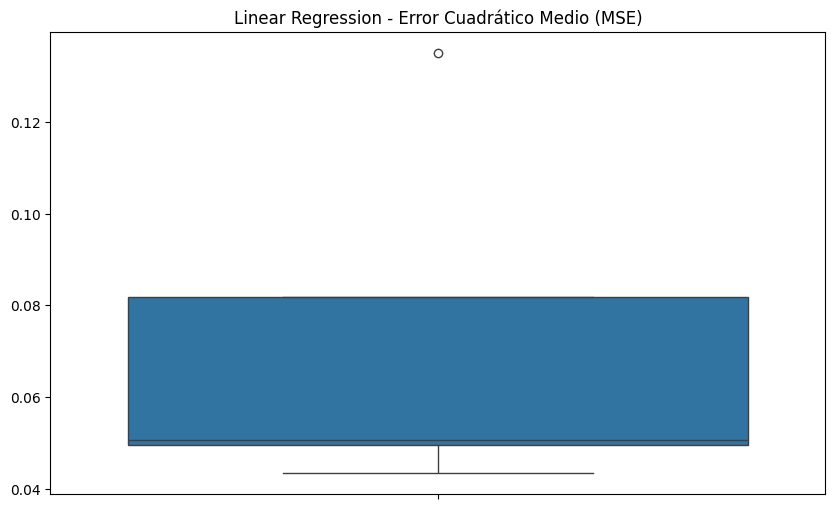

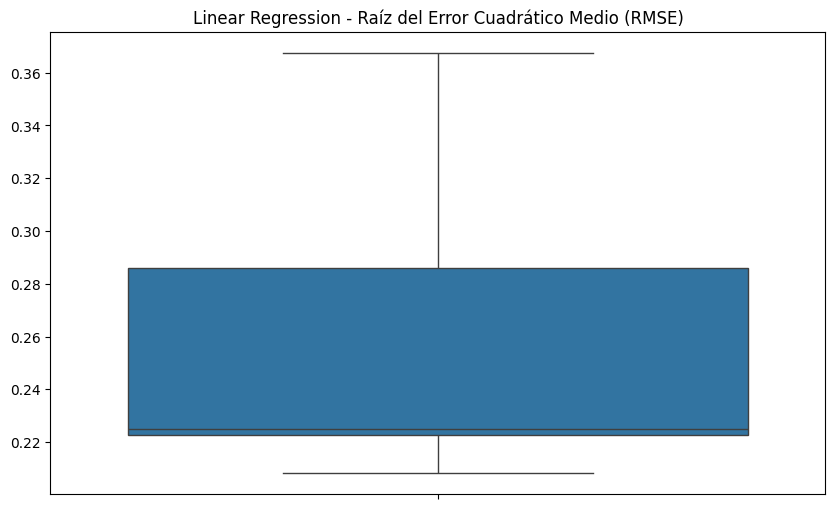

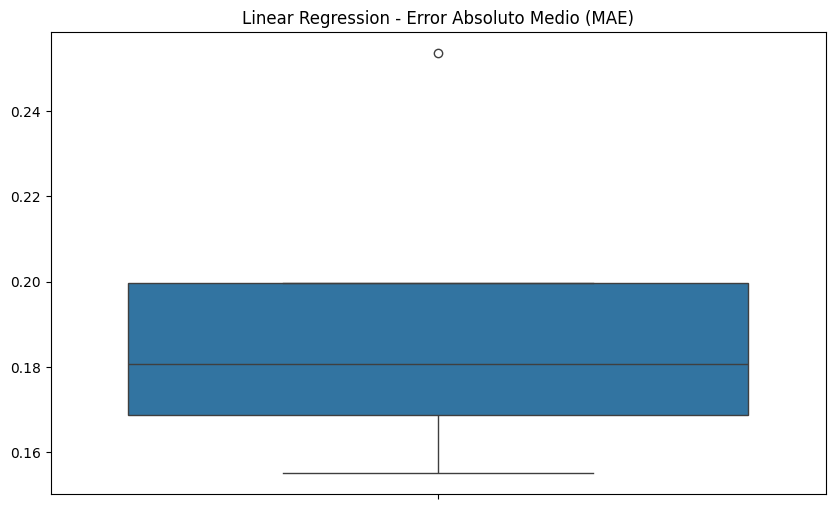

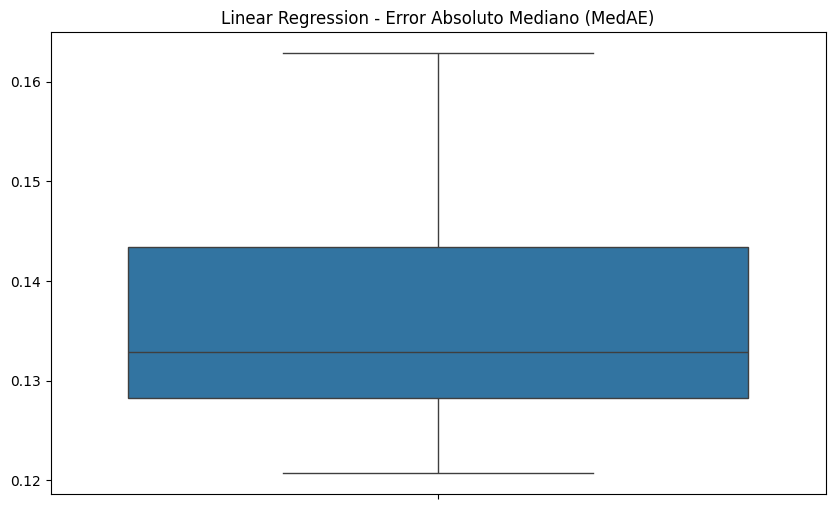

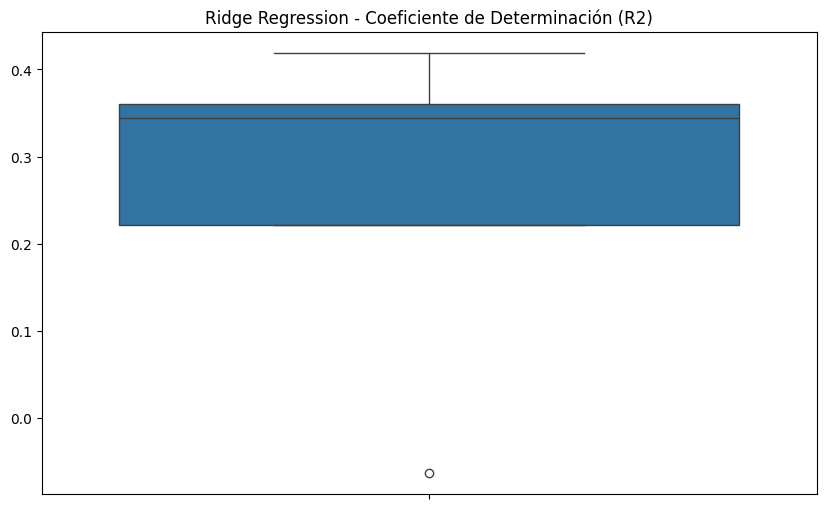

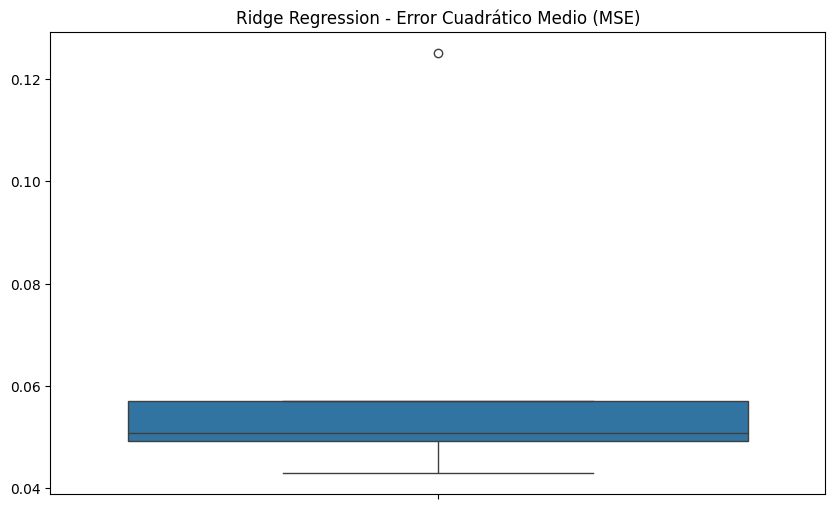

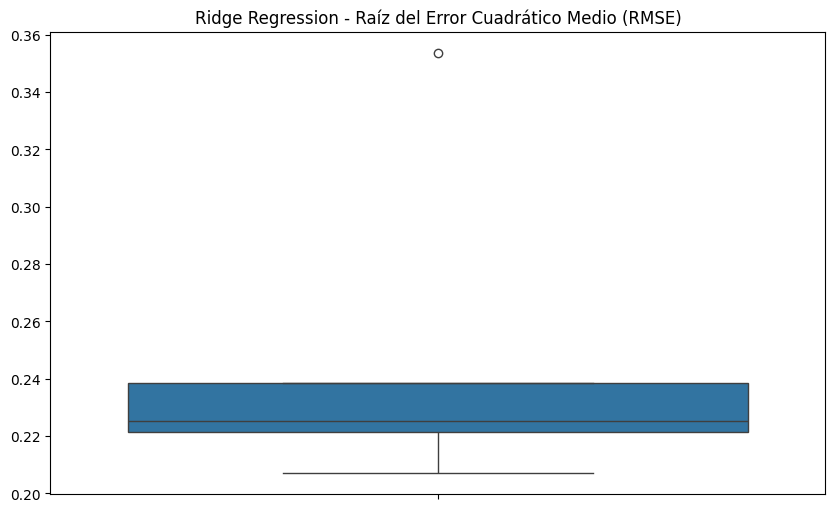

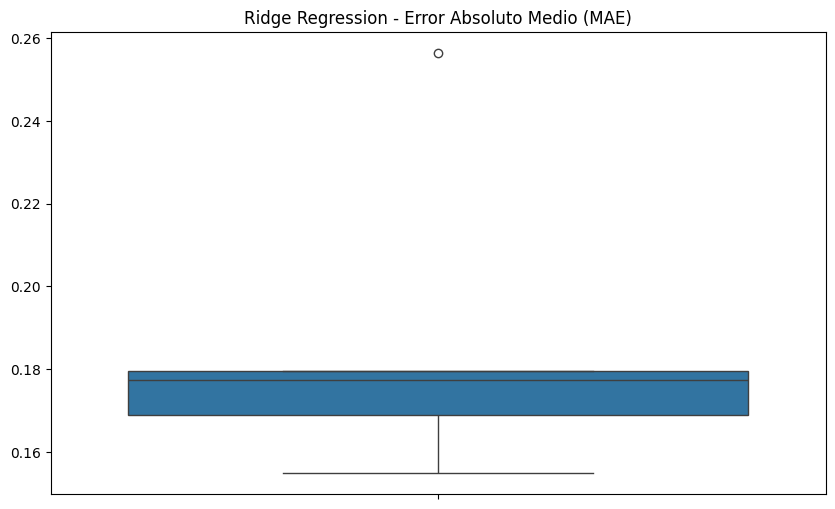

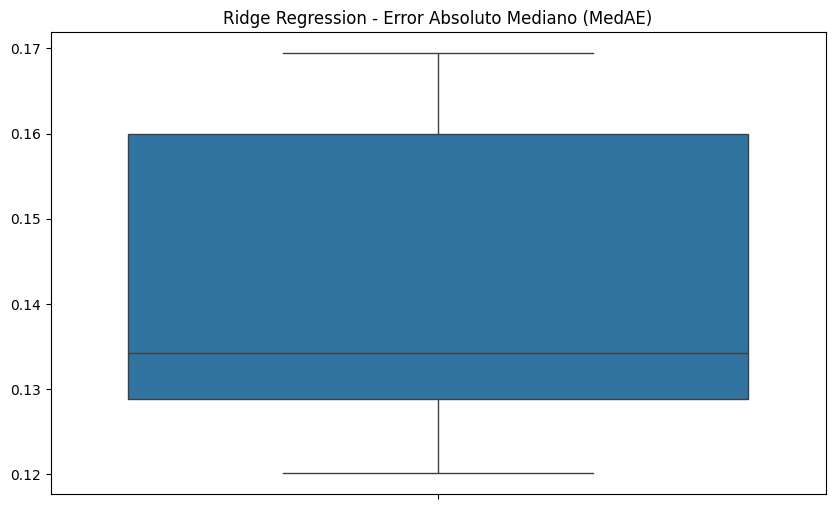

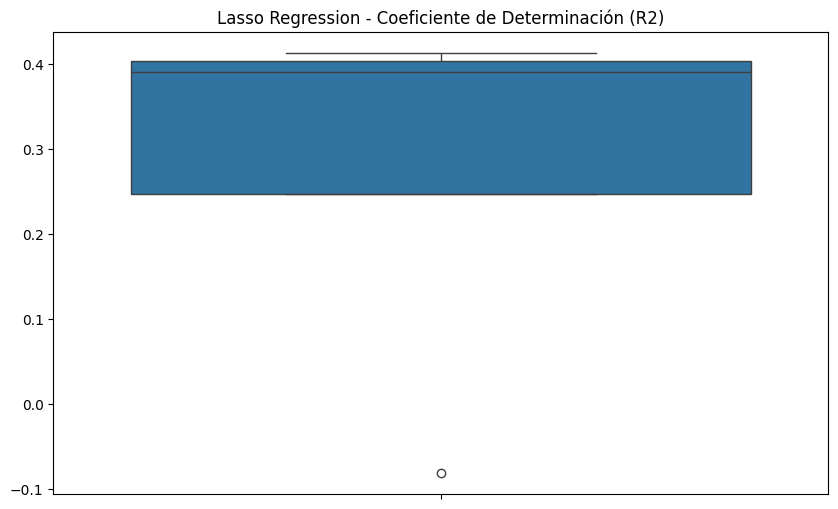

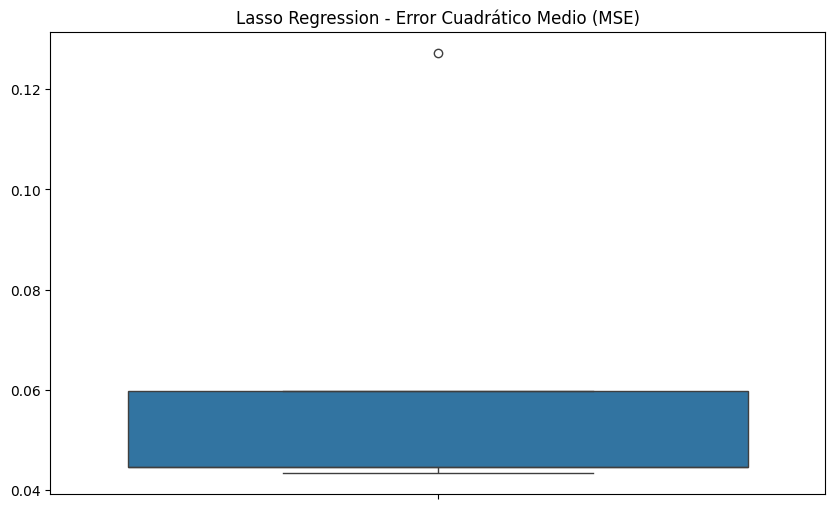

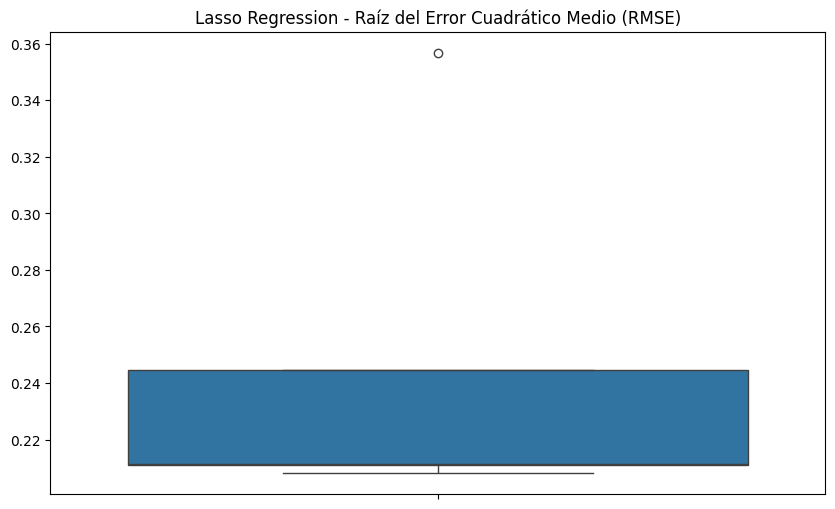

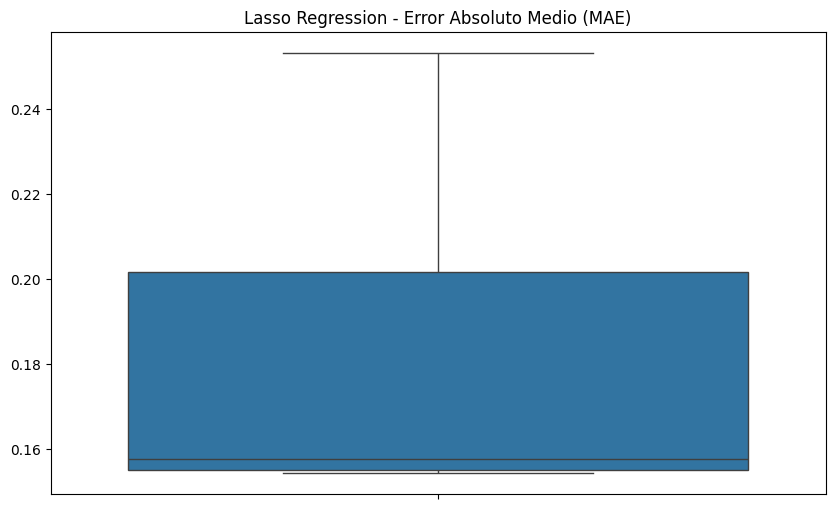

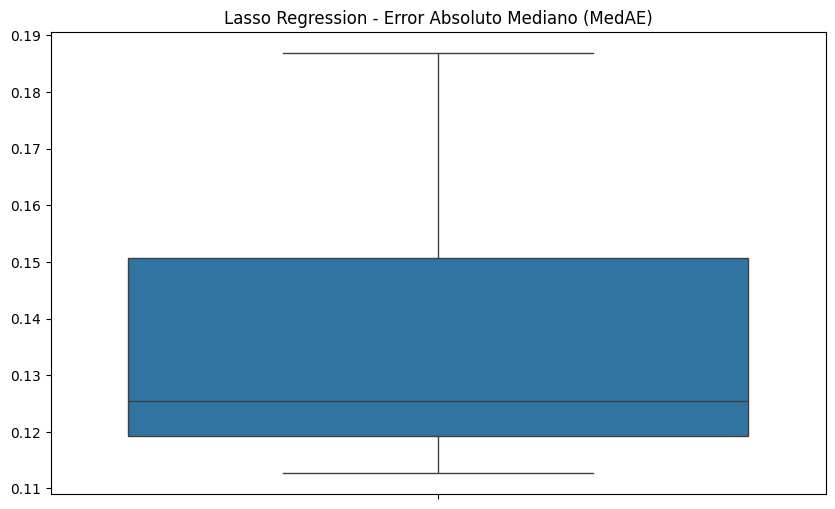

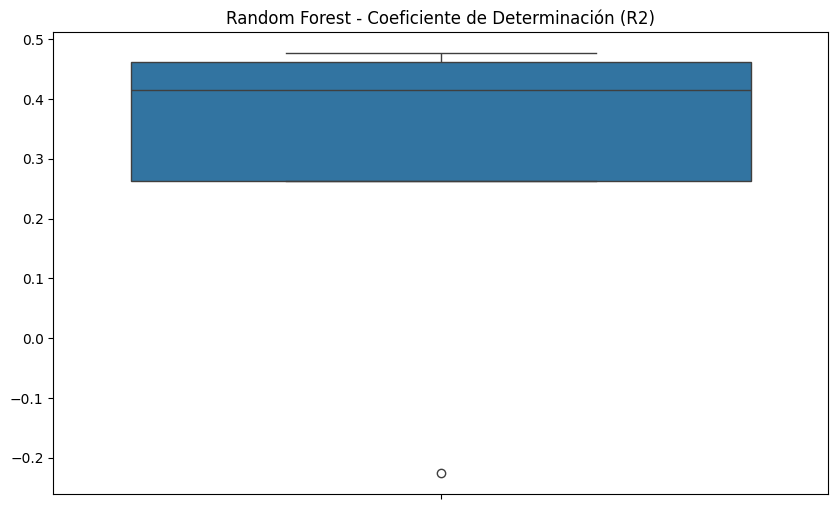

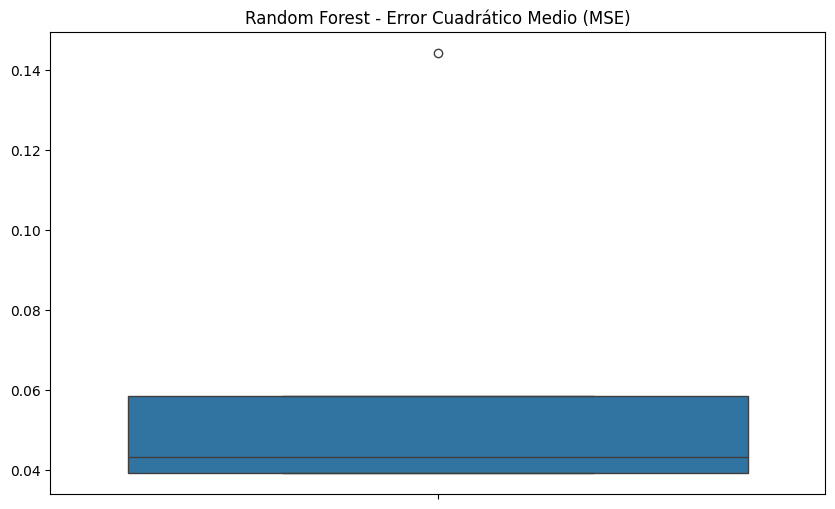

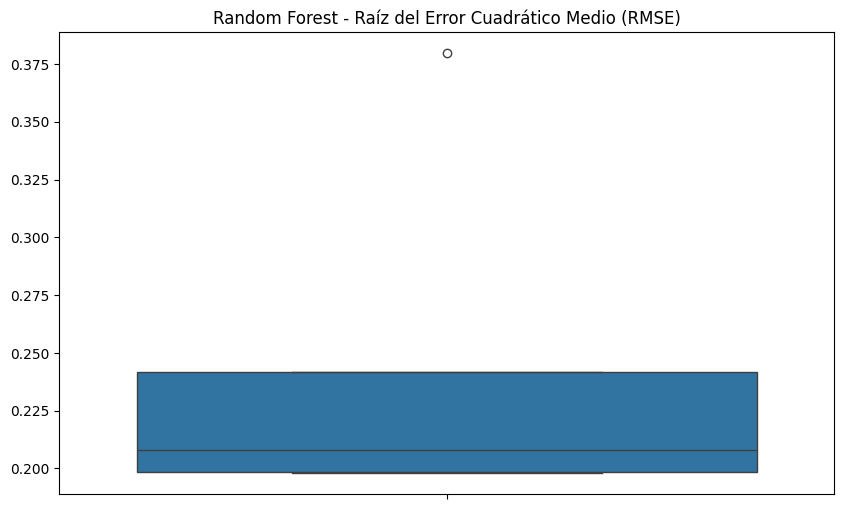

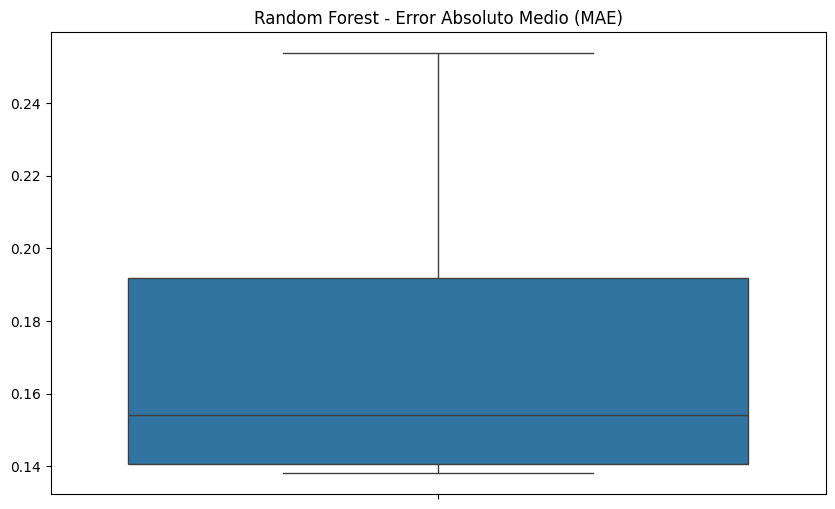

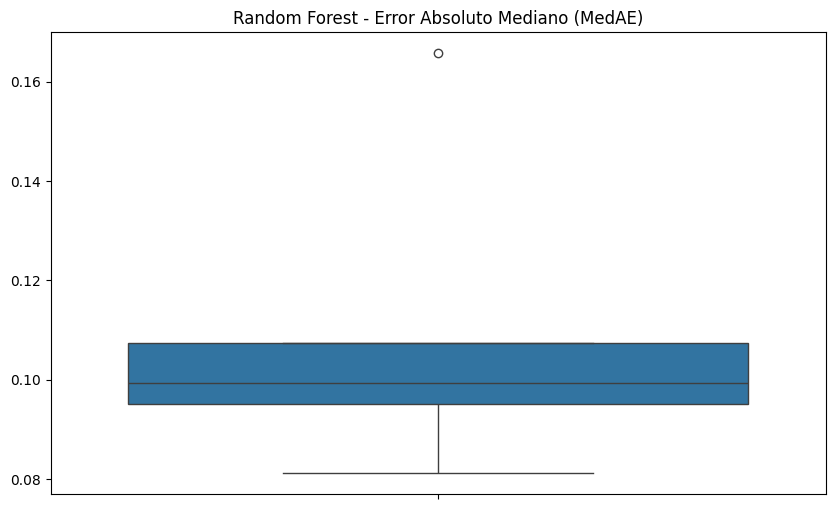

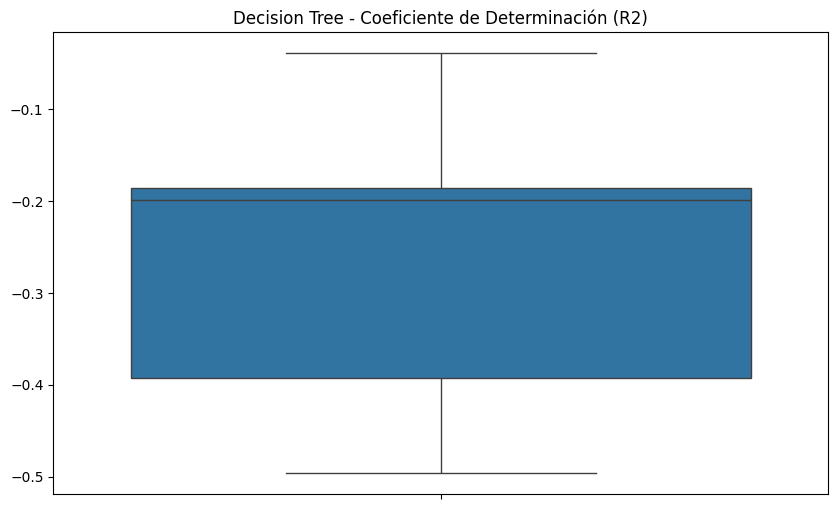

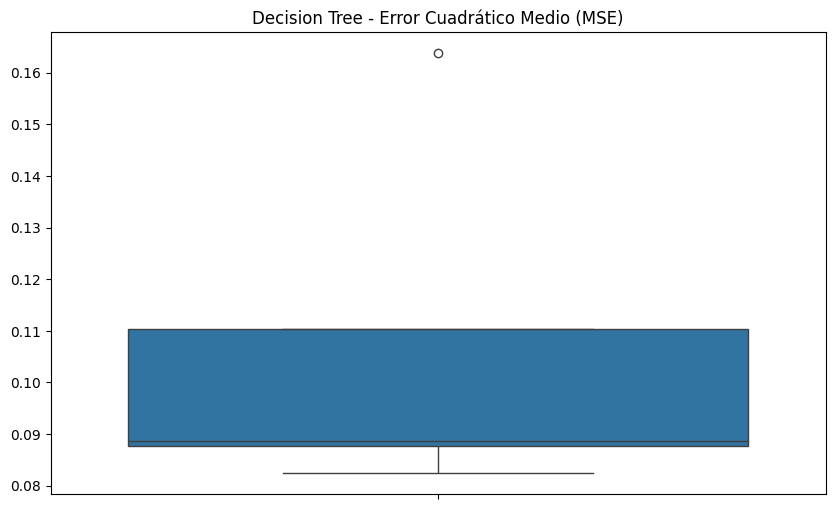

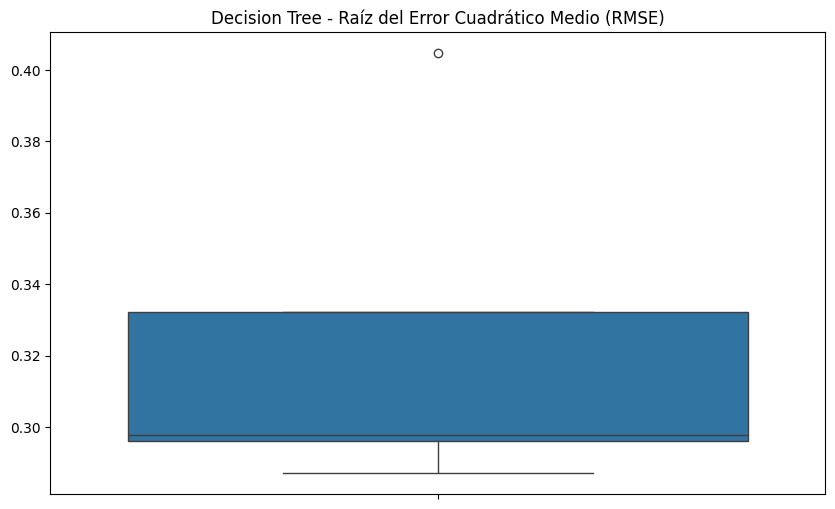

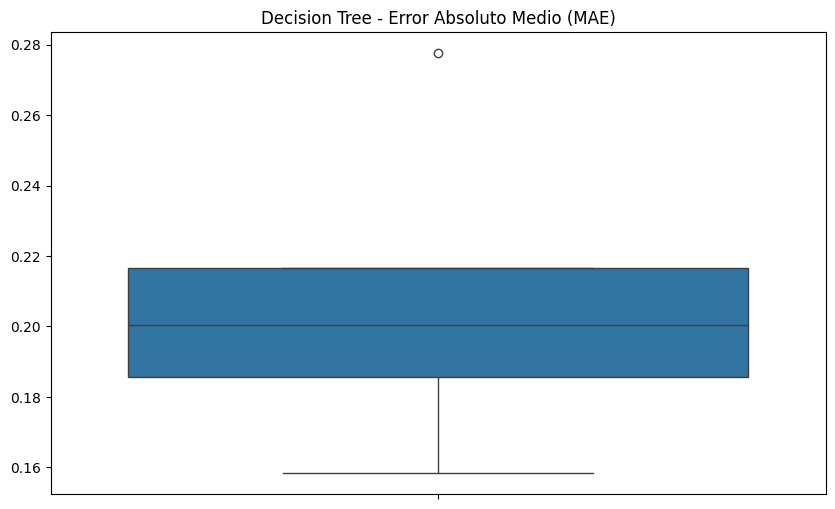

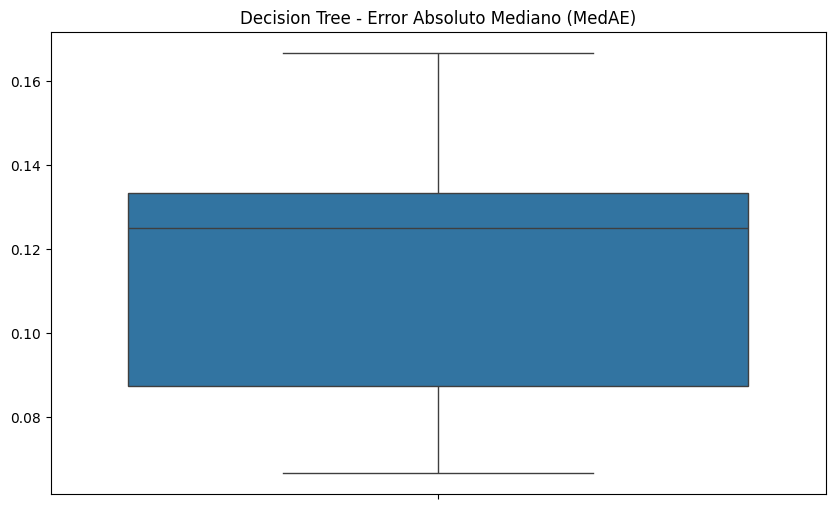

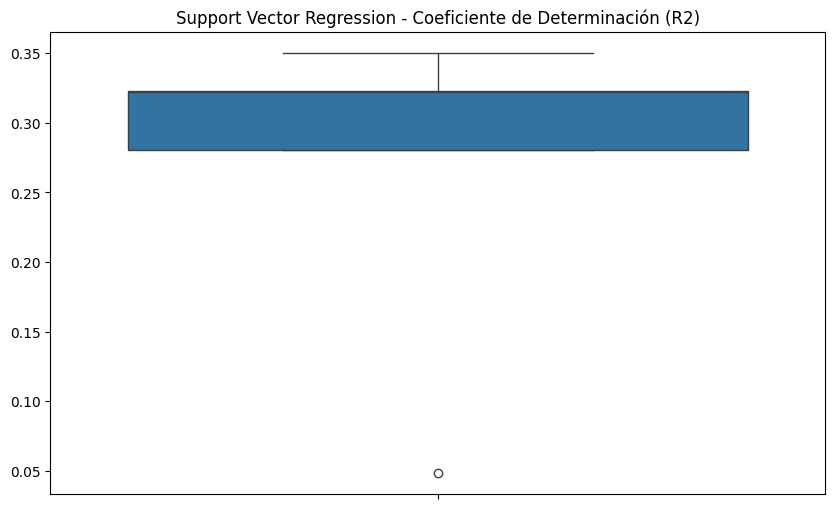

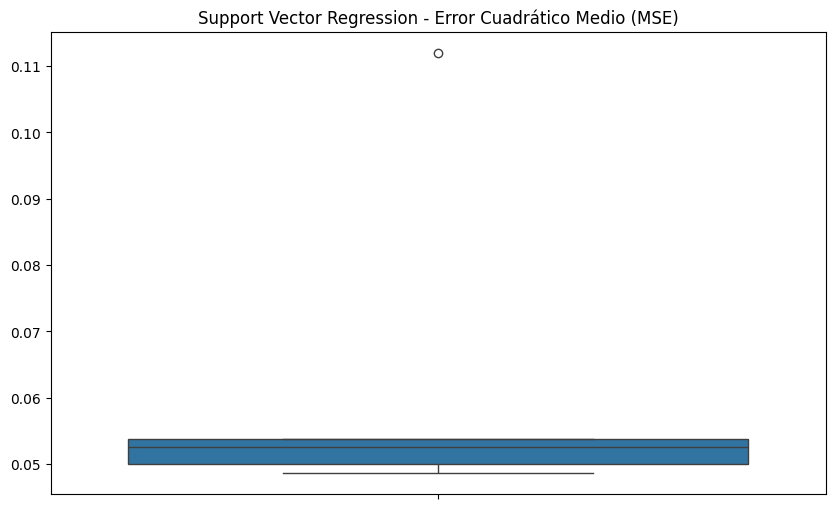

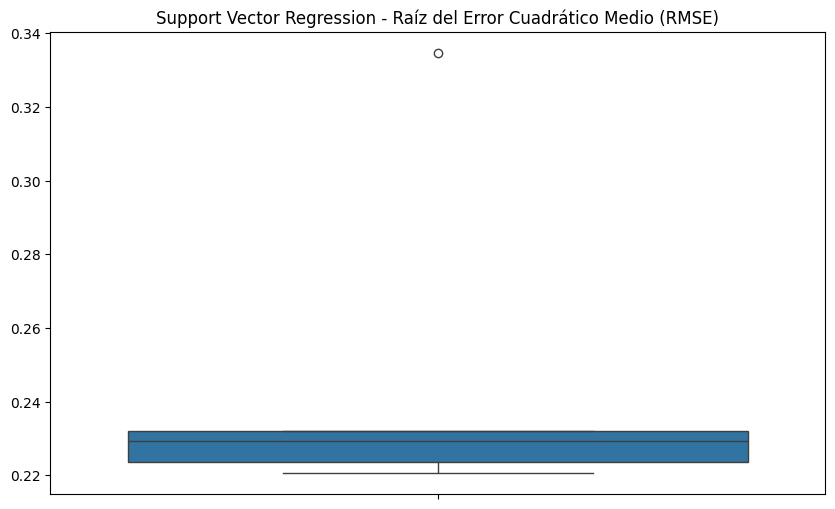

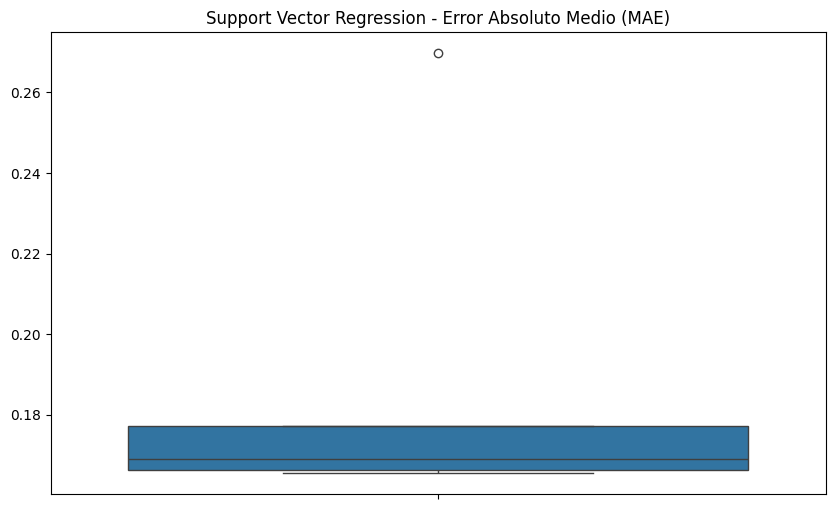

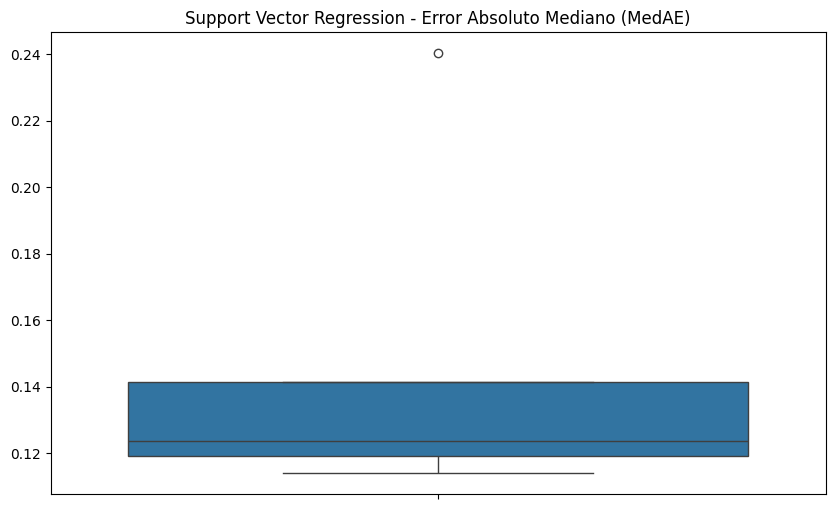

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'models' ya está definido y 'X_pca' y 'y' están preparados

# Métricas que queremos evaluar
scoring = ['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error',
           'neg_mean_absolute_error', 'neg_median_absolute_error']

# Realizamos la validación cruzada para cada modelo
for name, model in models:
    pipeline = make_pipeline(StandardScaler(), model)
    cv_results = cross_validate(pipeline, X_pca, y, cv=5, scoring=scoring, return_train_score=False)

    # Visualización de R2
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cv_results['test_r2'])
    plt.title(f'{name} - Coeficiente de Determinación (R2)')
    plt.show()

    # Convertimos los scores negativos en positivos para la visualización
    mse_scores = -cv_results['test_neg_mean_squared_error']
    rmse_scores = -cv_results['test_neg_root_mean_squared_error']
    mae_scores = -cv_results['test_neg_mean_absolute_error']
    medae_scores = -cv_results['test_neg_median_absolute_error']

    # Visualización de MSE
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=mse_scores)
    plt.title(f'{name} - Error Cuadrático Medio (MSE)')
    plt.show()

    # Visualización de RMSE
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=rmse_scores)
    plt.title(f'{name} - Raíz del Error Cuadrático Medio (RMSE)')
    plt.show()

    # Visualización de MAE
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=mae_scores)
    plt.title(f'{name} - Error Absoluto Medio (MAE)')
    plt.show()

    # Visualización de MedAE
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=medae_scores)
    plt.title(f'{name} - Error Absoluto Mediano (MedAE)')
    plt.show()

